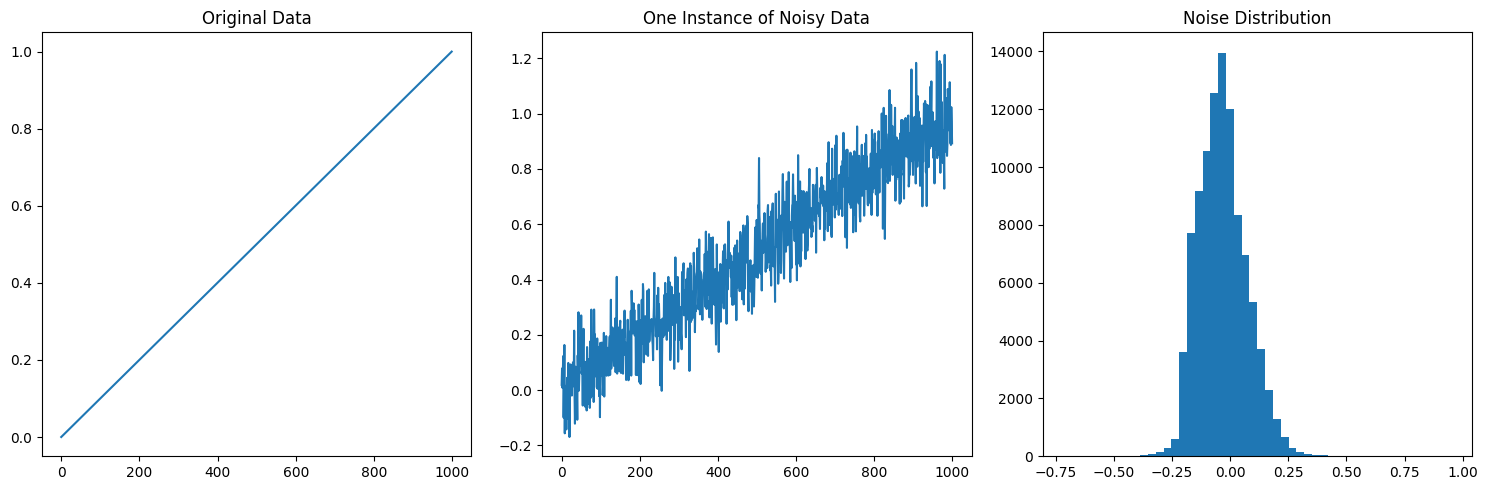

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

class MixedDistributionNoise:
    def __init__(self, distributions):
        """
        distributions: list of (distribution, weight) tuples
        """
        self.distributions = distributions
        weights = [d[1] for d in distributions]
        self.weights = np.array(weights) / sum(weights)
        
    def apply(self, data):
        # Choose distribution
        dist_idx = np.random.choice(len(self.distributions), p=self.weights)
        dist, _ = self.distributions[dist_idx]
        
        # Apply noise
        noise = dist.rvs(size=data.shape)
        return data + noise

# Usage example
noise_model = MixedDistributionNoise([
    (stats.norm(0, 0.1), 0.6),  # Gaussian noise (60% probability)
    (stats.uniform(-0.2, 0.2), 0.3),  # Uniform noise (30% probability)
    (stats.laplace(0, 0.1), 0.1)  # Laplace noise (10% probability)
])

# Create the noise model
noise_model = MixedDistributionNoise([
    (stats.norm(0, 0.1), 0.6),
    (stats.uniform(-0.2, 0.2), 0.3),
    (stats.laplace(0, 0.1), 0.1)
])

# Generate some sample data
original_data = np.linspace(0, 1, 1000)

# Apply noise multiple times to see the distribution
noisy_data = np.array([noise_model.apply(original_data) for _ in range(100)])

# Plotting
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(131)
plt.plot(original_data)
plt.title('Original Data')

# One instance of noisy data
plt.subplot(132)
plt.plot(noisy_data[0])
plt.title('One Instance of Noisy Data')

# Distribution of noise
plt.subplot(133)
plt.hist(noisy_data.flatten() - np.tile(original_data, 100), bins=50)
plt.title('Noise Distribution')

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

[[2.53299999]
 [2.53399992]
 [2.53900003]
 ...
 [2.51999998]
 [2.59599996]
 [0.        ]]


[6.69882754e+01 7.38940052e+01 6.50681832e+01 ... 5.41123790e+01
 5.29475856e+01 2.55873423e-02]


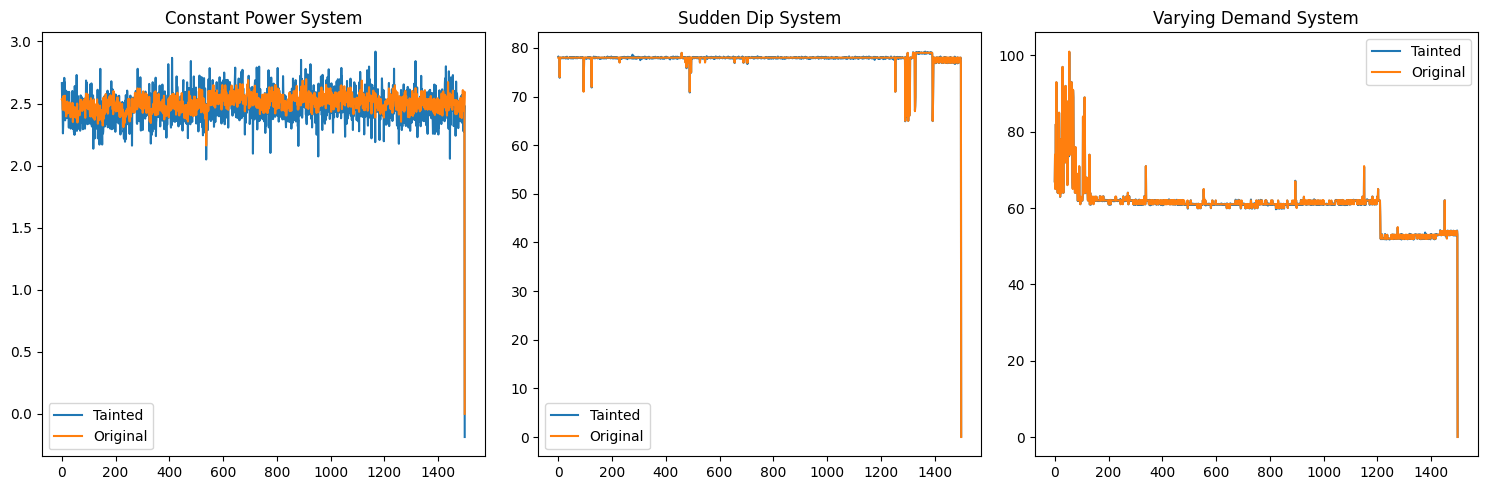

In [3]:
uk_val = pd.read_csv('iawe/uk_final.csv')
tv_val = pd.read_csv('iawe/tv_final.csv')
c_val = pd.read_csv('iawe/c_final.csv')

uk_val = uk_val.iloc[8500:,[6]].shift(periods=-1)
tv_val = tv_val.iloc[8500:,[6]].shift(periods=-1)
c_val = c_val.iloc[8500:,[6]].shift(periods=-1)

# print(uk_val)

uk_val = uk_val.fillna(0)
tv_val = tv_val.fillna(0)
c_val = c_val.fillna(0)

# convert to numpy array
uk_val = uk_val.to_numpy()
tv_val = tv_val.to_numpy()
c_val = c_val.to_numpy()

print(uk_val)
print("\n")

# convert to 1D array
uk_val = uk_val.flatten()
tv_val = tv_val.flatten()
c_val = c_val.flatten()

# noise model
noise_model = MixedDistributionNoise([
    (stats.norm(0, 0.1), 0.6),
    (stats.uniform(-0.2, 0.2), 0.3),
    (stats.laplace(0, 0.1), 0.1)
])

# Apply noise to each element in the arrays
uk_val_noisy = np.array([noise_model.apply(val) for val in uk_val])
tv_val_noisy = np.array([noise_model.apply(val) for val in tv_val])
c_val_noisy = np.array([noise_model.apply(val) for val in c_val])

print(c_val_noisy)

# Plotting
plt.figure(figsize=(15, 5))

n = np.linspace(0, len(tv_val) - 1, len(tv_val))

# Original data
plt.subplot(131)
plt.plot(n, uk_val_noisy, label='Tainted')
plt.plot(n, uk_val, label='Original')
plt.title('Constant Power System')
plt.legend()

# One instance of noisy data
plt.subplot(132)
plt.plot(n, tv_val_noisy, label='Tainted')
plt.plot(n, tv_val, label='Original')
plt.title('Sudden Dip System')
plt.legend()

# Distribution of noise
plt.subplot(133)
plt.plot(n, c_val_noisy, label='Tainted')
plt.plot(n, c_val, label='Original')
plt.title('Varying Demand System')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# save the noisy data to csv

uk_val_noisy = pd.DataFrame(uk_val_noisy)
tv_val_noisy = pd.DataFrame(tv_val_noisy)
c_val_noisy = pd.DataFrame(c_val_noisy)

uk_val_noisy.to_csv('iawe/noisy/uk_final_noisy.csv', index=False)
tv_val_noisy.to_csv('iawe/noisy/tv_final_noisy.csv', index=False)
c_val_noisy.to_csv('iawe/noisy/c_final_noisy.csv', index=False)